# pandas에 대해 알아보자

출처 : BOAZ 10기 발표 자료

### 서론
* Q. 왜 pandas를 사용하는가?
* A. 쓸수록 모르겠다.

* 파이썬 내에 데이터프레임 형식이 없으니 쓰는 것이겠지만  개인적으로 R이 훨씬 [편안]하다.
* 그래도 여차여차 발표해야하니 R에 비해 쓸만한 부분을 연구보았다.

### *pandas의 장점
* 1. 차원에 대한 장점
* 2. numpy기반으로 만들어짐. 데이터 분석 도구도 포함
* 3. NA처리가 짜릿 - R로 연산하다 NA섞여있어서 화가 많이 나신 분들을 위해 준비했다.

### Q. 왜 이름이 이렇게 귀여운가요?
### A. [pan]al  [da]ta
### - 와이드데이터? 롱데이터? 패널데이터?

## *데이터 프레임?
### - 여러 개의 데이터 타입을 column별로 담은 데이터!
### - 각 column을 feature, variable 등으로 볼 수 있다.
### - 데이터베이스도 이와 마찬가지의 형태를 보인다. (row = record, col = feature)
### - 수집된 데이터를 저장할 때(보통csv) 많이 이용하니 빅데이터 동아리인 우리에게 꼬옥 필요하다고 볼 수 있다.

# 1. 데이터 구조
## 1. Series
### - 얼핏 시계열 개념같지만 그냥 1차원 친구이다.

In [1]:
import pandas as pd
obj = pd.Series([-4, 3, 1, 2])
obj
# 값이 여러개일때 보통 []안에 넣는다. R에서 c()와 비슷한 개념.
# 왼쪽이 index, 오른쪽이 value

0   -4
1    3
2    1
3    2
dtype: int64

In [2]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [3]:
obj.values

array([-4,  3,  1,  2], dtype=int64)

In [4]:
# index를 넣어보자
obj2 = pd.Series([-4, 3, 1, 2], index = ['b', 'a', 'c', 'd'])
obj2

b   -4
a    3
c    1
d    2
dtype: int64

In [5]:
obj2.index

Index(['b', 'a', 'c', 'd'], dtype='object')

In [6]:
# 매우매우 중요한 데이터 접근
# 숫자 접근
obj2[1] # 0부터 시작이니까 두번째~

3

In [7]:
# 슬라이싱도 됨~
obj2[0:2]

b   -4
a    3
dtype: int64

In [11]:
# 문자 접근도 됨~
obj2['a']

3

In [22]:
# 두개도 됨~ 대신 두개이상은 []안에
# 기존 순서와 상관없이 내가 인덱싱한 순서대로 출력
obj2[['a', 'b']]

a    3
b   -4
dtype: int64

In [23]:
# value를 바꾸고 싶을 때에는 R에서 처럼과 비슷
obj2['b'] = 4
obj2

b    4
a    3
c    1
d    2
dtype: int64

In [26]:
# 인덱스 체크, 불리안(T/F)으로 출력
'b' in obj2

True

In [29]:
'e' in obj2

False

In [32]:
# index = key, value = value
# 딕셔너리의 개념과 비슷하겠구나!, 데이터프레임에도 마찬가지이니 꼭 기억!
C_team = {'구교정':1996, '백찬규':1992, '이명아':1995, '신상윤':1991, '이혜원':1994, '서아정':1995}
obj3 = pd.Series(C_team)
obj3

구교정    1996
백찬규    1992
서아정    1995
신상윤    1991
이명아    1995
이혜원    1994
dtype: int64

In [33]:
# Series의 index와 다른 index를 설정하면 어떻게 되지?
alcoholic = {'백찬규', '신상윤', '신준호', '이명아', '이혜원', '서아정'}
obj4 = pd.Series(C_team, index = alcoholic)
obj4

백찬규    1992.0
신준호       NaN
신상윤    1991.0
이혜원    1994.0
이명아    1995.0
서아정    1995.0
dtype: float64

In [34]:
# NA가 있느냐? 불리안으로 출력
pd.isnull(obj4)
# pd.notnull은 이와 반대

백찬규    False
신준호     True
신상윤    False
이혜원    False
이명아    False
서아정    False
dtype: bool

In [37]:
# 데이터간 연산.
print(obj3+obj4)
# 구교정 왜 NA일까? 교집합 개념으로 생각하면 될 듯

구교정       NaN
백찬규    3984.0
서아정    3990.0
신상윤    3982.0
신준호       NaN
이명아    3990.0
이혜원    3988.0
dtype: float64


## 2. DataFrame

In [85]:
data = {'name':['구교정', '백찬규', '이명아', '신상윤', '이혜원', '서아정'],
        'year':[1996, 1992, 1995, 1991, 1994, 1995],
        '초반?':[True, False, False, False, False, False]}
frame = pd.DataFrame(data)
frame

,name,year,초반?
0,구교정,1996,True
1,백찬규,1992,False
2,이명아,1995,False
3,신상윤,1991,False
4,이혜원,1994,False
5,서아정,1995,False


In [86]:
# Series와 마찬가지로 index정할 수 있음. 줄의 차이일뿐 Series와 많은 것들이 비슷하다고 보면 됨
frame = pd.DataFrame(data, index = ['구', '백', '이', '신', '리', '서'])
frame

,name,year,초반?
구,구교정,1996,True
백,백찬규,1992,False
이,이명아,1995,False
신,신상윤,1991,False
리,이혜원,1994,False
서,서아정,1995,False


In [49]:
# 시리즈와 마찬가지로 없는 것을 만들면 NA처리
frame2 = pd.DataFrame(data, columns=['name', 'year', '초반?', '후반?'])
frame2

,name,year,초반?,후반?
0,구교정,1996,True,NaN
1,백찬규,1992,False,NaN
2,이명아,1995,False,NaN
3,신상윤,1991,False,NaN
4,이혜원,1994,False,NaN
5,서아정,1995,False,NaN


In [54]:
# 역시나 중요한 데이터 접근
# 이때부터 pandas의 인성이 드러난다.
# index나 숫자를 통해 접근가능한 Series 혹은 R과 다르게 pandas.DataFrame에선 column 이름으로만 접근할 수 있다.
frame['name']

구    구교정
백    백찬규
이    이명아
신    신상윤
리    이혜원
서    서아정
Name: name, dtype: object

In [55]:
# 이런 것도 가능
frame.year

구    1996
백    1992
이    1995
신    1991
리    1994
서    1995
Name: year, dtype: int64

In [57]:
# 이러한 인성질을 막기 위해 이런 함수가 있다.
frame.ix['신'] # 이제 인덱스 접근 가능
#frame.loc['신']도 가능하다

name      신상윤
year     1991
초반?     False
Name: 신, dtype: object

In [58]:
# 근데 이젠 column 접근이 안됨 ㅋ
frame.ix['year']
# 오류마저 길게 내는 끔찍한 인성이다.

KeyError: 'year'

In [66]:
# 사실 해결가능하다.
# column 으로 접근하기
frame.ix[:,'초반?']
# R에서와 비슷하게 ,를 기준으로 왼쪽은 행 오른쪽은 열이다.
# R에서는 전부 인덱싱하고 싶으면 비워두면 되지만, 이곳은 :을 꼭 찍어야한다.

구     True
백    False
이    False
신    False
리    False
서    False
Name: 초반?, dtype: bool

In [67]:
# 숫자로 슬라이싱 가능
frame.ix[0:3, 'year']

구    1996
백    1992
이    1995
Name: year, dtype: int64

In [104]:
# 마찬가지로 여러가지 요소를 쓸때에는 []가 필요하다
frame.ix[['구', '백'], ['year', '초반?']]

,year,초반?
구,1996,True
백,1992,False


In [70]:
# 컬럼 만들기. R과 비슷하다. 없는 이름을 만들어서 값을 넣어준다.
frame['후반?'] = [False, True, False, True, False, False]
frame

,name,year,초반?,후반?
구,구교정,1996,True,False
백,백찬규,1992,False,True
이,이명아,1995,False,False
신,신상윤,1991,False,True
리,이혜원,1994,False,False
서,서아정,1995,False,False


In [72]:
# 조건문도 가능
frame['진짜 후반?'] = frame['year'] < 1992
frame

,name,year,초반?,후반?,진짜 후반?
구,구교정,1996,True,False,False
백,백찬규,1992,False,True,False
이,이명아,1995,False,False,False
신,신상윤,1991,False,True,True
리,이혜원,1994,False,False,False
서,서아정,1995,False,False,False


In [73]:
# 죄송스러우니까 지워드리자
del frame['진짜 후반?']
frame

,name,year,초반?,후반?
구,구교정,1996,True,False
백,백찬규,1992,False,True
이,이명아,1995,False,False
신,신상윤,1991,False,True
리,이혜원,1994,False,False
서,서아정,1995,False,False


In [74]:
# 또 지워드리자...
frame.drop('후반?', axis = 1)
# 여기서 axis의 역할은 다소 잔인하다.
# 여기선 열방향을 의미하지만 뒤에가서 할 연산에서 행방향을 의미한다. pandas를 쓰는걸 재고해야할 부분이다.

,name,year,초반?
구,구교정,1996,True
백,백찬규,1992,False
이,이명아,1995,False
신,신상윤,1991,False
리,이혜원,1994,False
서,서아정,1995,False


In [76]:
# 사실 안지워짐 ㅋ
print(frame)

frame = frame.drop('후반?', axis = 1)
print(frame)
# R에서 처럼 할당해야 지워진다

  name  year    초반?    후반?
구  구교정  1996   True  False
백  백찬규  1992  False   True
이  이명아  1995  False  False
신  신상윤  1991  False   True
리  이혜원  1994  False  False
서  서아정  1995  False  False
  name  year    초반?
구  구교정  1996   True
백  백찬규  1992  False
이  이명아  1995  False
신  신상윤  1991  False
리  이혜원  1994  False
서  서아정  1995  False


In [78]:
# DataFrame을 만드는 또다른 방법
age = pd.DataFrame({'백찬규':{2017:26, 2018:27}, '신상윤':{2017:27, 2018:28}})
age
# 딕셔너리 안에 또 딕셔너리가 있음. {열:{행:값}} 이러한 전개

,백찬규,신상윤
2017,26,27
2018,27,28


## 2. pandas 주요 함수

In [87]:
# reindex, row 순서를 바꿔줄 수 있다. 기존의 없는 index를 넣으면 NA가 들어간다.
frame2 = frame.reindex(['신', '백', '리', '서', '이', '구', '킹'])
frame2

,name,year,초반?
신,신상윤,1991.0,False
백,백찬규,1992.0,False
리,이혜원,1994.0,False
서,서아정,1995.0,False
이,이명아,1995.0,False
구,구교정,1996.0,True
킹,NaN,NaN,NaN


In [118]:
# set index, 한 열을 인덱스로 바꿔줄 수 있다.
frame3 = frame.set_index('name')
frame3

,year,초반?
name,,
구교정,1996,True
백찬규,1992,False
이명아,1995,False
신상윤,1991,False
이혜원,1994,False
서아정,1995,False


In [95]:
# 특정 값으로 대체할 수 있다.
frame2 = frame.reindex(['신', '백', '리', '서', '이', '구', '킹'], fill_value = 0)
frame2

,name,year,초반?
신,신상윤,1991,False
백,백찬규,1992,False
리,이혜원,1994,False
서,서아정,1995,False
이,이명아,1995,False
구,구교정,1996,True
킹,0,0,0


In [97]:
# 행을 삭제해보자, 방향은 아까와 다르게 0이죠?
frame2 = frame2.drop('킹', axis = 0)
frame2

,name,year,초반?
신,신상윤,1991,False
백,백찬규,1992,False
리,이혜원,1994,False
서,서아정,1995,False
이,이명아,1995,False
구,구교정,1996,True


In [106]:
# sort, 말그대로이다.
frame.sort_index(by=['year'])

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


,name,year,초반?
신,신상윤,1991,False
백,백찬규,1992,False
리,이혜원,1994,False
이,이명아,1995,False
서,서아정,1995,False
구,구교정,1996,True


### 이거 만들다가 갑자기 생각난 점
### pandas가 numpy기반으로 제작되어 여기 역시 연산기능이 있으나
### 숫자로만 이뤄진 데이터프레임은 사실상 nparray와 다를 것이 없어 거의 생략하였습니다...
### 생각난김에 몇가지 해볼까요?

In [108]:
# 더해주는 함수입니다.
frame.sum(axis = 0)
# 아까 말씀 드렸으니 열을 지울때는 axis=1 였지만 여기선 열별로 더하는데 axis=0입니다 방향이 헷갈리니 주의 

name    구교정백찬규이명아신상윤이혜원서아정
year                 11963
초반?                   True
dtype: object

In [109]:
# 평균입니다. 문자열은 평균이 따로 없겠죠?
frame.mean()
# 불리안 값은 T = 1, F = 0 입니다. 하등한 컴퓨터는 0과 1밖에 모르기 때문이죠

year    1993.833333
초반?        0.166667
dtype: float64

In [110]:
# 개체수를 세어줍니다.
frame.count()

name    6
year    6
초반?     6
dtype: int64

In [113]:
# groupby, R에 dplyr에 나오는 groupby와 비슷하면서 조금은 달라 보입니다.
frame.groupby('year')['name'].count()
# .을 찍고 함수를 실행하는건 R에서 %>%와 비슷해 보이는군요.

year
1991    1
1992    1
1994    1
1995    2
1996    1
Name: name, dtype: int64

In [114]:
# R에서 summary와 비슷해보입니다!
frame.describe()

,year
count,6.000000
mean,1993.833333
std,1.940790
min,1991.000000
25%,1992.500000
50%,1994.500000
75%,1995.000000
max,1996.000000


## 3. 계층적 색인
### 처음에 말씀드린 차원의 이득이 있다는 내용입니다.

In [115]:
import numpy as np
hie = pd.Series(np.random.randn(10), index=[['a','a','a','b','b','b','c','c','d','d'],[1,2,3,1,2,3,1,2,2,3,]])
hie
# 롱데이터 같이 생겼습니다.
# 왜 유용할까요?
# 실제로 pandas는 Series, DataFrame, panel 총 세가지 타입을 지원한다.

a  1   -0.212112
   2    1.098536
   3   -0.192331
b  1    0.140073
   2   -0.113273
   3    0.503925
c  1    1.838529
   2    0.413508
d  2    0.681896
   3    0.799365
dtype: float64

In [116]:
# 와이드로 다시 필 땐 이렇게
hie.unstack()

,1,2,3
a,-0.212112,1.098536,-0.192331
b,0.140073,-0.113273,0.503925
c,1.838529,0.413508,NaN
d,NaN,0.681896,0.799365


In [117]:
# 아까 보던 데이터도 이런식으로 표현할 수 있습니다.
frame.stack()

구  name      구교정
   year     1996
   초반?      True
백  name      백찬규
   year     1992
   초반?     False
이  name      이명아
   year     1995
   초반?     False
신  name      신상윤
   year     1991
   초반?     False
리  name      이혜원
   year     1994
   초반?     False
서  name      서아정
   year     1995
   초반?     False
dtype: object

## 4. 병합과 조인
### 데이터 베이스 다룰 때 매우 중요

In [120]:
# 데이터를 추가로 만들면 헷갈리니 있던 걸 쪼게겠슴다
df1 = frame[['name', 'year']]
df2 = frame[['name', '초반?']]
print(df1)
print(df2)

  name  year
구  구교정  1996
백  백찬규  1992
이  이명아  1995
신  신상윤  1991
리  이혜원  1994
서  서아정  1995
  name    초반?
구  구교정   True
백  백찬규  False
이  이명아  False
신  신상윤  False
리  이혜원  False
서  서아정  False


In [121]:
# 일대일 조인
merge1 = pd.merge(df1, df2)
merge1
# 같은 column을 자동으로 파악해 이를 key로 정하여 합쳐집니다.
# 주의! 순서대로 붙여지는게 아님

,name,year,초반?
0,구교정,1996,True
1,백찬규,1992,False
2,이명아,1995,False
3,신상윤,1991,False
4,이혜원,1994,False
5,서아정,1995,False


In [125]:
# 키는 스스로 알아서 잘 찾긴 하지만 on = 인자를 사용해서 설정해줄 수도 있습니다.
merge1 = pd.merge(df1, df2, on = 'name')
merge1
# 위랑 똑같죠?

,name,year,초반?
0,구교정,1996,True
1,백찬규,1992,False
2,이명아,1995,False
3,신상윤,1991,False
4,이혜원,1994,False
5,서아정,1995,False


In [122]:
# 다대일 조인
df3 = pd.DataFrame({'year':[1996, 1995, 1994, 1992, 1991], 'age':[23,24,25,27,28]})
df3

,age,year
0,23,1996
1,24,1995
2,25,1994
3,27,1992
4,28,1991


In [124]:
merge2 = pd.merge(merge1, df3)
merge2

,name,year,초반?,age
0,구교정,1996,True,23
1,백찬규,1992,False,27
2,이명아,1995,False,24
3,서아정,1995,False,24
4,신상윤,1991,False,28
5,이혜원,1994,False,25


##### 다대다 조인은 코드가 귀찮아서 그림으로... pd.merge()만 한것입니다.

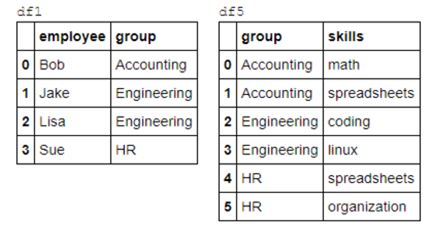
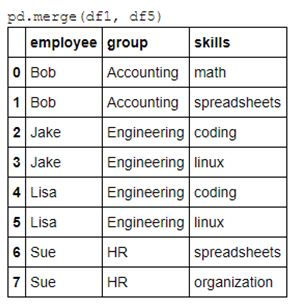

In [127]:
# column 이름을 기준으로 찾는데, column이름이 다르다면 어떨까요?
df2.columns = ['이름', '초반?'] # .columns, 이름 변경할 때 사용하는 함수입니다.
print(df1)
print(df2)

  name  year
구  구교정  1996
백  백찬규  1992
이  이명아  1995
신  신상윤  1991
리  이혜원  1994
서  서아정  1995
    이름    초반?
구  구교정   True
백  백찬규  False
이  이명아  False
신  신상윤  False
리  이혜원  False
서  서아정  False


In [128]:
# 이름이 다르니 그냥 하면 못찾죠?
merge3 = pd.merge(df1, df2)

MergeError: No common columns to perform merge on

In [130]:
# 열이 하나 더 생겨버리긴 합니다.
merge3 = pd.merge(df1, df2, left_on='name', right_on='이름')
merge3

,name,year,이름,초반?
0,구교정,1996,구교정,True
1,백찬규,1992,백찬규,False
2,이명아,1995,이명아,False
3,신상윤,1991,신상윤,False
4,이혜원,1994,이혜원,False
5,서아정,1995,서아정,False


In [131]:
# 이렇게 코드를 짜면 깔끔!
merge4 = pd.merge(df1, df2, left_on='name', right_on='이름').drop('이름', axis=1)
merge4

,name,year,초반?
0,구교정,1996,True
1,백찬규,1992,False
2,이명아,1995,False
3,신상윤,1991,False
4,이혜원,1994,False
5,서아정,1995,False


In [132]:
# 키가 되는 column이 없으면 어떨까요?
del df1['name']
del df2['이름']
print(df1)
print(df2)

   year
구  1996
백  1992
이  1995
신  1991
리  1994
서  1995
     초반?
구   True
백  False
이  False
신  False
리  False
서  False


In [133]:
# index는 고유하기 때문에 이를 키로 활용해봅시다.
merge5 = pd.merge(df1, df2, left_index=True, right_index=True)
merge5

,year,초반?
구,1996,True
백,1992,False
이,1995,False
신,1991,False
리,1994,False
서,1995,False


##### innner, outer도 그림으로 ㅎㅎ

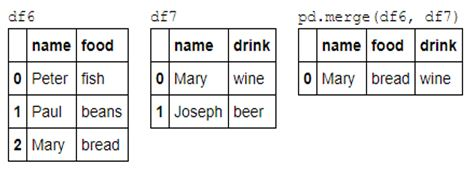
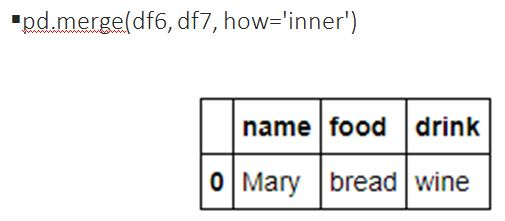
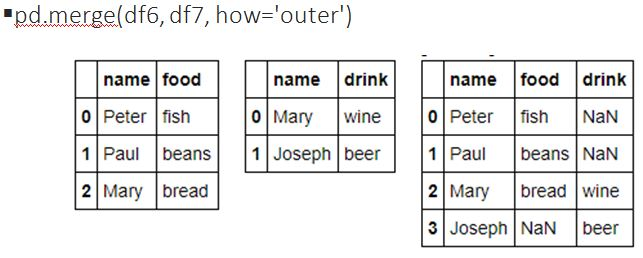

##### 같은 이름이 있을 때

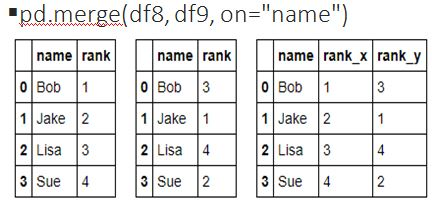

In [134]:
# suffixes= 라는 인자로 _x를 대체할 수도 있습니다.

## 5. 실습 데이터 분석

In [135]:
import seaborn
titanic = seaborn.load_dataset('titanic')
titanic.head() # 상단만 보는 함수

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [136]:
# 성별별 생존률
titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [137]:
# 행은 성별 열은 좌석등급(class)
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [138]:
# 위와 같은 결과를 내는 pivot_table 함수
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [141]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', index = ['sex', age], columns = 'class', aggfunc='mean')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663